# Parsing through a CSV file

Example exercises to read through a csv file holding informaton about twitter feeds

### Sample1 : Find percentage of tweeting from a specific country

In [152]:
import csv


def line2array(line):
    return line.rstrip().split(',')


def get_twitter_data(csv_fname):  # Open csv file
    print('reading data')
    with open(csv_fname, 'r') as f:
        csvreader = csv.reader(f)
        for line in csvreader:
            yield line


def get_userlocation(array_iter):  # Get array holding user location info
    print('getting location of tweet')
    for i, arr in enumerate(array_iter):
        yield arr[2]


def count_tweets(array_iter, country='Australia'):
    count_country = 0
    count_tweets = 0

    for i, arr in enumerate(array_iter):
        if i > 0:  # Skip header row
            count_tweets += 1
            if arr.find(country) >= 0:
                print('Tweet from {} in {}!'.format(country, arr))
                count_country += 1

    print('done searching')
    percentage_tweets = (count_country / float(count_tweets)) * 100
    print('Total tweets {}'.format(count_tweets))
    print('Percentage of tweets from {} = {}'.format(country, percentage_tweets))
    return count_country

In [153]:
filename = "twitterfeed.csv"
itertweet = iter(get_twitter_data(filename))
headerrows = next(itertweet)  #First row is header
print(headerrows)

reading data
['Tweet', 'TwitterHandle', 'UserLocation', 'DateCreated', 'NumberofRetweets']


In [154]:
filename = "twitterfeed.csv"
count_tweets(get_userlocation(get_twitter_data(filename)));

getting location of tweet
reading data
Tweet from Australia in Melbourne, Australia!
Tweet from Australia in Melbourne, Australia!
done searching
Total tweets 486
Percentage of tweets from Australia = 0.411522633744856


### Get data from multiple countries ( and plot a bar graph?)

In [155]:
#Count tweets from multiple locations
def count_tweets_by_location(array_iter, countrylist):
    countdict = {key: 0 for key in countrylist}
    for i, arr in enumerate(array_iter):
        for country in countrylist:
            if i > 0:  # Skip header row
                if arr.find(country) >= 0:
                    countdict[country] += 1

    print('done searching')
    print(countdict)
    return countdict

In [158]:
filename = "twitterfeed.csv"
tweet_by_country = count_tweets_by_location(get_userlocation(
    get_twitter_data(filename)), countrylist=['USA', 'India', 'UK', 'Australia'])

getting location of tweet
reading data
done searching
{'USA': 14, 'India': 8, 'UK': 4, 'Australia': 2}


Text(0,0.5,'Number of tweets')

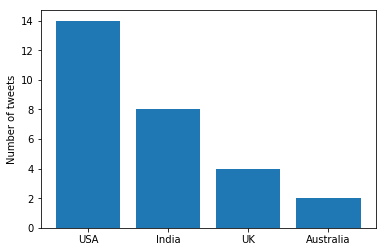

In [166]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.bar(range(len(tweet_by_country)), list(tweet_by_country.values()), align='center');
plt.xticks(range(len(tweet_by_country)), list(tweet_by_country.keys()));
plt.ylabel('Number of tweets')

Other Samples : Number of options available:

1. Number of tweets in last 5 minutes
2. Number of average characters tweeted on a topic (topics : Python, neuroscience, Trump!?)
3. Correlate average characters with country of origin